In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from torch.utils.data import DataLoader, TensorDataset
#from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
#import pytorch_lightning as pl
#import torch
import numpy as np
import logging
import time
import matplotlib.pyplot as plt
#import torch.nn.functional as F
from sklearn.cluster import KMeans
from collections import Counter

import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay


In [4]:
df = pd.read_csv('../project_2/catdogdata.txt', delimiter = ' ')
df['label'] = 0 # cats are the first 99 entries
df.loc[99:198, 'label'] = 1 # dogs are the next 99 entries
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096,label
1,23,23,20,20,9,9,9,4,4,4,...,108,108,108,89,65,51,31,23,9,0
2,250,250,250,244,244,244,244,244,232,232,...,244,244,232,244,244,244,244,232,244,0
3,137,137,137,144,151,151,151,158,151,151,...,89,89,78,78,78,100,102,124,124,0
4,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,37,45,52,0
5,173,173,173,173,158,158,158,158,153,149,...,64,64,48,48,77,98,64,45,45,0


In [5]:
def plot_examples(df, n=10):
    """
    Plot n examples from the dataset.
    Assumes the last column is the label.
    """
    indices = np.random.choice(df.index, n, replace=False)
    df = df.loc[indices]
    
    fig, axes = plt.subplots(1, n, figsize=(2.5 * n, 3))
    for i in range(n):
        image = df.iloc[i, :-1].values.reshape((64, 64))
        label = df.iloc[i, -1]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

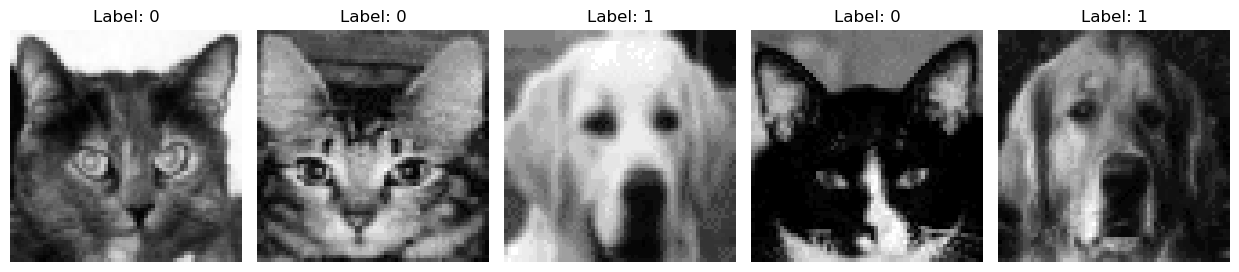

In [6]:
# Rotate all images 90 degrees clockwise
def rotate_image(image):
    return np.rot90(image.reshape(64, 64), -1).flatten()

# Apply the rotation to all rows and update the DataFrame
rotated_images = np.array([rotate_image(row.values) for _, row in df.iloc[:, :-1].iterrows()])
df.iloc[:, :-1] = rotated_images

# plot example images after rotation
plot_examples(df, n=5)

In [7]:
df_mnist = pd.read_csv('../project_2/Numbers.txt', delimiter=' ')
df_mnist['label'] = df_mnist.iloc[:, 0]
df_mnist = df_mnist.iloc[:, 1:]
X_mnist = df_mnist.iloc[:, :-1].values
y_mnist = df_mnist.iloc[:, -1].values

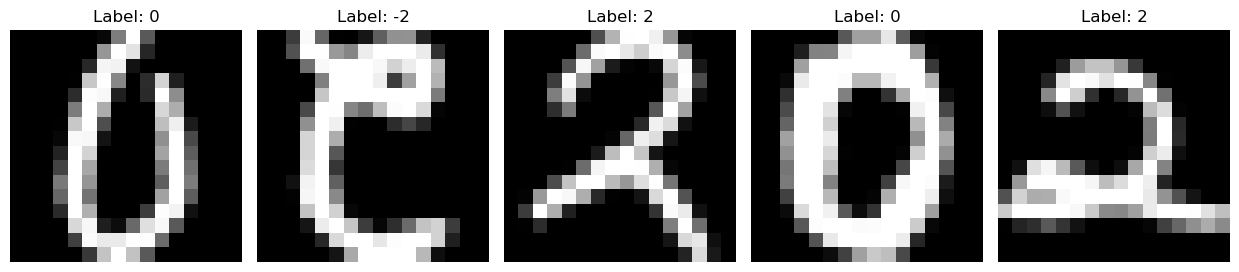

In [8]:
def plot_examples_mnist(df, n=10):
    indices = np.random.choice(df.index, n, replace=False)
    df = df.loc[indices]
    
    fig, axes = plt.subplots(1, n, figsize=(2.5 * n, 3))
    for i in range(n):
        image = df.iloc[i, :-1].values.reshape((16, 16))
        label = df.iloc[i, -1]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
    
# plot example images
plot_examples_mnist(df_mnist, n=5)

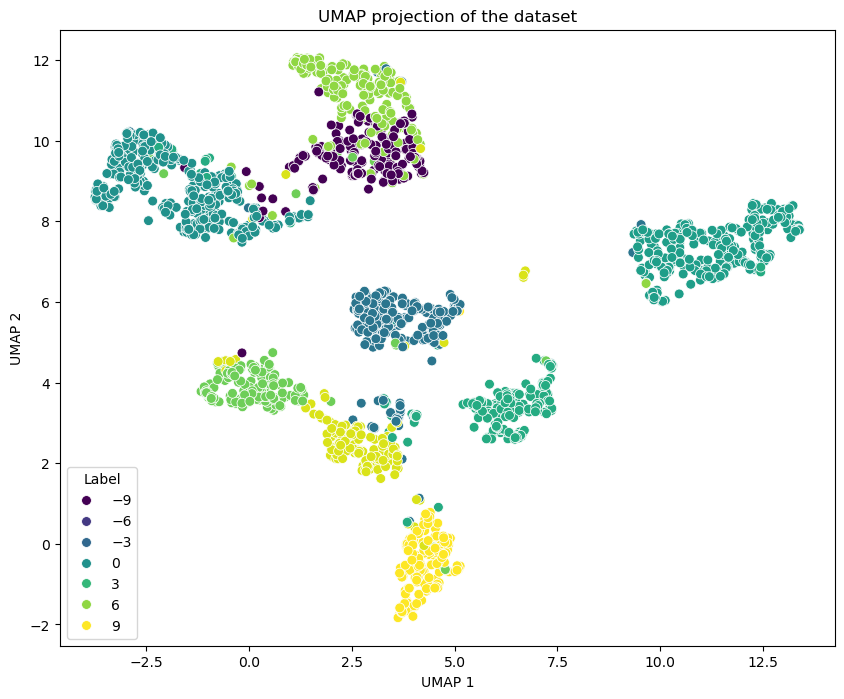

In [9]:
# Use UMAP to create a low-dimensional representation of the data

# Assuming df is your DataFrame and the last column is the label
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)

# Plot the UMAP representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=50)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Label')
plt.show()

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


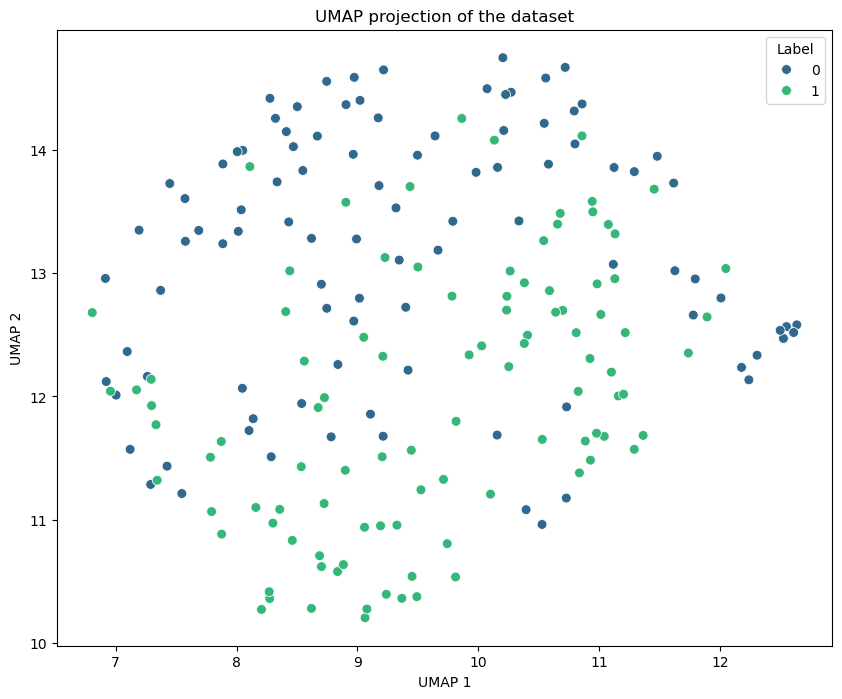

In [10]:
# Now for the cat-dog dataset
# Use UMAP to create a low-dimensional representation of the data

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)
# Plot the UMAP representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=50)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Label')
plt.show()

# K-means

Test

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'K-means clustering on UMAP-reduced MNIST')

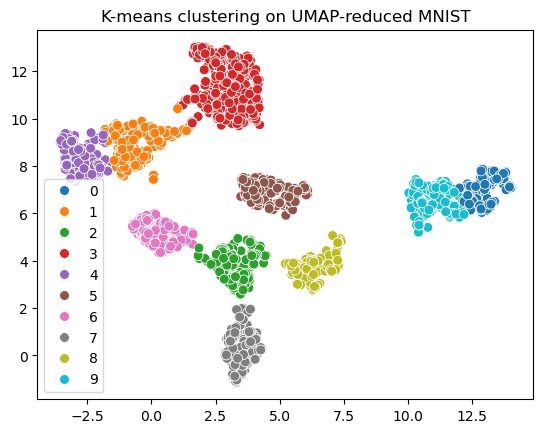

In [11]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)


kmeans.fit(X_umap)
labels = kmeans.predict(X_umap)

plt.figure()
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='tab10', s=50)
plt.title("K-means clustering on UMAP-reduced MNIST")

# Pick #of clusters using Elbow method and Silhouette score

In [12]:
from sklearn.metrics import silhouette_score

def get_elbow_score(X,cluster_size):
    scores = []
    for k in cluster_size:
        kmeans = KMeans(n_clusters=k, n_init = 10, random_state=None)
        kmeans.fit(X)
        scores.append(kmeans.inertia_)

    return np.array(scores)

def get_silhouette_score(X,cluster_size):
    scores = []
    for k in cluster_size:
        if k == 1: 
            scores.append(0)
            continue

        kmeans = KMeans(n_clusters=k, n_init = 10, random_state=None)
        score = silhouette_score(X, kmeans.fit_predict(X))

        scores.append(score)

    return scores


Using bootstrapped samples to get best k

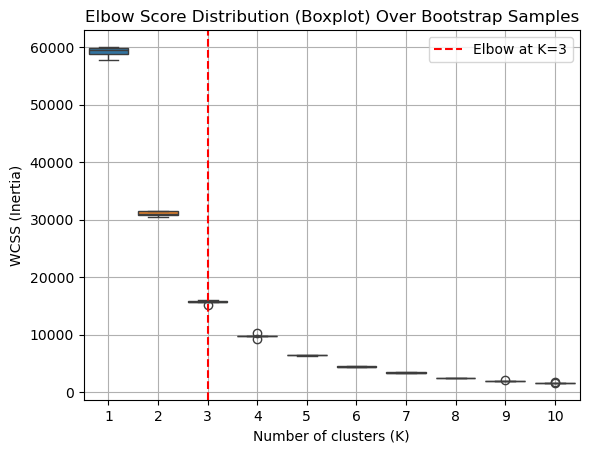

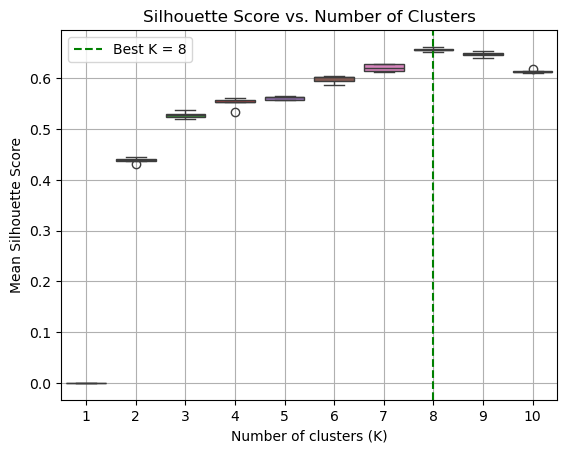

In [16]:
from sklearn.utils import resample
from kneed import KneeLocator

cluster_size = np.arange(1,11)
elbow_scores = []
silhouette_scores = []

iterations = 5
for i in range(iterations):
    X_bs, y_bs = resample(X_umap, y, replace=True)
    elbow = get_elbow_score(X_bs,cluster_size)
    silhouette = get_silhouette_score(X_bs,cluster_size)
    
    elbow_scores.append(elbow)
    silhouette_scores.append(silhouette)

#Elbow
elbow_scores = np.array(elbow_scores)
mean_scores = elbow_scores.mean(axis=0)  
kneedle = KneeLocator(x=cluster_size, y=mean_scores, curve='convex', direction='decreasing')

#Silhouette
silhouette_scores = np.array(silhouette_scores)
mean_silhouette = silhouette_scores.mean(axis=0)
best_k_index = np.argmax(mean_silhouette)
best_k = cluster_size[best_k_index]


plt.figure()
sns.boxplot(data=elbow_scores)
plt.axvline(kneedle.knee -1, color='red', linestyle='--', label=f'Elbow at K={kneedle.knee}')
plt.xticks(ticks=np.arange(len(cluster_size)), labels=cluster_size)
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Score Distribution (Boxplot) Over Bootstrap Samples")
plt.legend()
plt.grid(True)
plt.show()


plt.figure()
sns.boxplot(data=silhouette_scores)
plt.axvline(best_k-1, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.xticks(ticks=np.arange(len(cluster_size)), labels=cluster_size)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Mean Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

2. Stability-Based Evaluation (a form of pseudo-CV)

Bootstrap resampling or subsampling is used to test whether the clustering is stable:

Run clustering multiple times on resampled subsets of the data.
Use Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI) to compare how similar the clusterings are across samples.

This tells you whether the clusters are reproducible.

In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def kmeans_CVinnerloop(cluster_size, X_bs, y=None, mode='silhouette'):

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    all_scores = []

    for train_index, _ in kf.split(X_bs):
        X_train = X_bs[train_index]

        if mode == 'silhouette':
            scores = get_silhouette_score(X_train, cluster_size)
        elif mode == 'elbow':
            scores = get_elbow_score(X_train, cluster_size)
        else:
            raise ValueError("Invalid mode. Choose 'silhouette' or 'elbow'.")

        all_scores.append(scores)

    all_scores = np.array(all_scores) 
    mean_scores = np.mean(all_scores, axis=0)

    if mode == 'silhouette':
        best_k_index = np.argmax(mean_scores)
        best_k = cluster_size[best_k_index]
        best_score = mean_scores[best_k_index]

    elif mode == "elbow":
        kneedle = KneeLocator(x=cluster_size, y=mean_scores, curve='convex', direction='decreasing')
        best_k = kneedle.knee
        best_score = best_k
        
    if best_k is not None:
        kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
        best_labels = kmeans.fit_predict(X_umap)


    return best_k, best_score, best_labels, mean_scores

In [18]:
def kmeans_outerloop(num_runs, cluster_size, X_umap, y, mode='silhouette'):
    best_k_list = []
    best_scores_list = []
    best_labels_list = []
    mean_scores_list = []  

    for run in range(num_runs):
        X_bs, _ = resample(X_umap, y, replace=True) #Bootsrapped sample (small data perturbations)

        best_k, best_score, best_labels,mean_scores  = kmeans_CVinnerloop(cluster_size, X_bs, y, mode=mode)
        best_k_list.append(best_k)
        best_scores_list.append(best_score)
        best_labels_list.append(best_labels)
        mean_scores_list.append(mean_scores) 


    # Compute pairwise ARI and NMI
    ari_matrix = np.zeros((num_runs, num_runs))
    nmi_matrix = np.zeros((num_runs, num_runs))

    for i in range(num_runs):
        for j in range(num_runs):
            if i != j:
                ari_matrix[i, j] = adjusted_rand_score(best_labels_list[i], best_labels_list[j])
                nmi_matrix[i, j] = normalized_mutual_info_score(best_labels_list[i], best_labels_list[j])
            else:
                ari_matrix[i, j] = 1.0
                nmi_matrix[i, j] = 1.0

    """Plot clustering results (each run)"""
    fig, axes = plt.subplots(1, num_runs, figsize=(5 * num_runs, 4), squeeze=False)
    for i, labels in enumerate(best_labels_list):
        ax = axes[0][i]
        ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=10)
        ax.set_title(f'Run {i+1}\nBest K = {best_k_list[i]}')
        ax.set_xlabel('UMAP-1')
        ax.set_ylabel('UMAP-2')
    plt.tight_layout()
    plt.show()

    """Plot score vs number of clusters"""
    k_freq = Counter(best_k_list)
    most_frequent_k = k_freq.most_common(1)[0][0]

    plt.figure()
    for i in range(len(mean_scores_list)):
        plt.scatter(cluster_size, mean_scores_list[i], alpha=0.4)

    plt.xlabel('Number of clusters (K)')
    if mode== 'silhouette':
        plt.ylabel('Silhouette score')
        plt.title('Silhouette Scores Across Bootstrap Runs')
        plt.axvline(most_frequent_k, color='red', linestyle='--', label=f'Most frequent best K = {most_frequent_k}')
    elif mode== "elbow":
        plt.ylabel('Sum of Squared Errors')
        plt.title('Sum of Squared Errors Across Bootstrap Runs')
        plt.axvline(most_frequent_k, color='red', linestyle='--', label=f'Most frequent Elbow = {most_frequent_k}')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    """Plot comparison to true labels (using most frequent k as comparison)"""
    kmeans_comparison = KMeans(n_clusters=most_frequent_k, n_init=10, random_state=42)
    best_labels_pred = kmeans_comparison.fit_predict(X_umap)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.scatter(X_umap[:, 0], X_umap[:, 1], c=best_labels_pred, cmap='tab10', s=30)
    ax1.set_title(f'KMeans Clusters (most frequent K = {most_frequent_k})')
    ax1.set_xlabel('UMAP 1')
    ax1.set_ylabel('UMAP 2')

    ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=30)
    ax2.set_title('True Labels')
    ax2.set_xlabel('UMAP 1')
    ax2.set_ylabel('UMAP 2')

    plt.tight_layout()
    plt.show()

    ari = adjusted_rand_score(y, best_labels_pred)
    nmi = normalized_mutual_info_score(y, best_labels_pred)
    print(f"ARI (vs true labels): {ari:.3f}")
    print(f"NMI (vs true labels): {nmi:.3f}")


    return {
        "best_k_list": best_k_list,
        "best_scores_list": best_scores_list,
        "best_labels_list": best_labels_list,
        "ari_matrix": ari_matrix,
        "nmi_matrix": nmi_matrix,
    }

# Mnist dataset Results

## Elbow

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


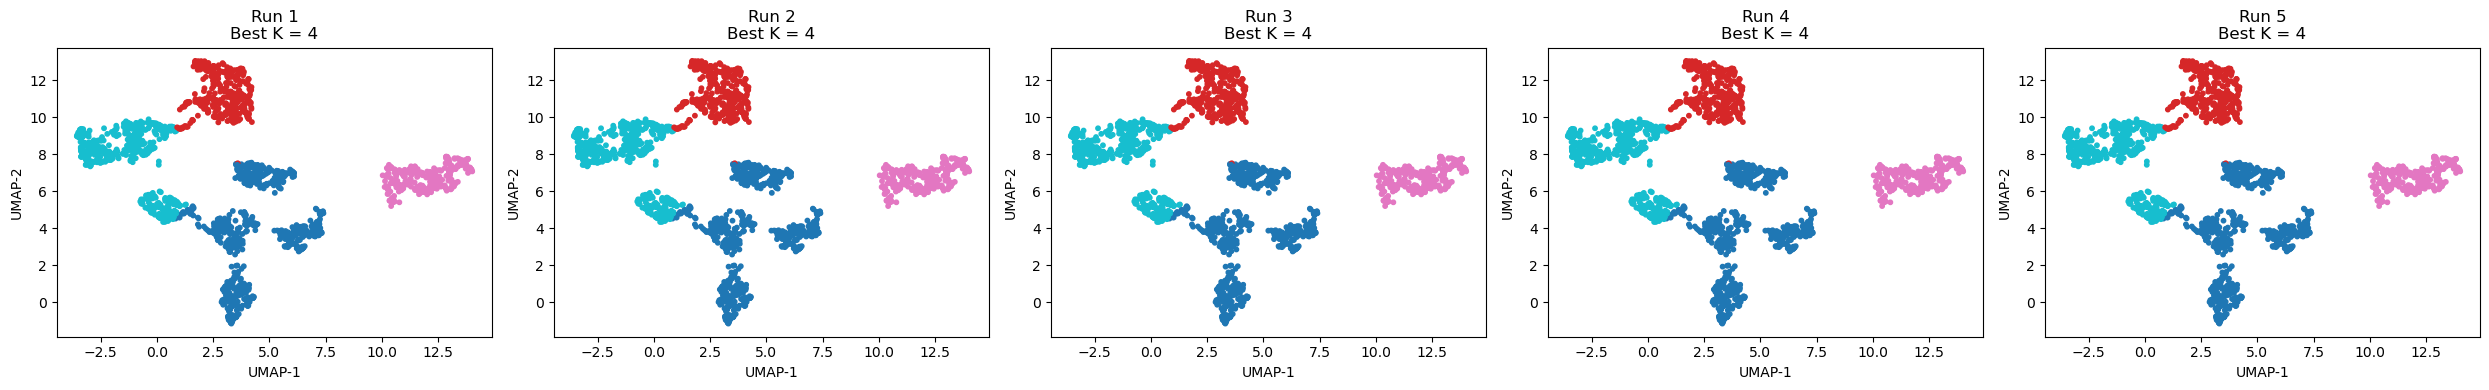

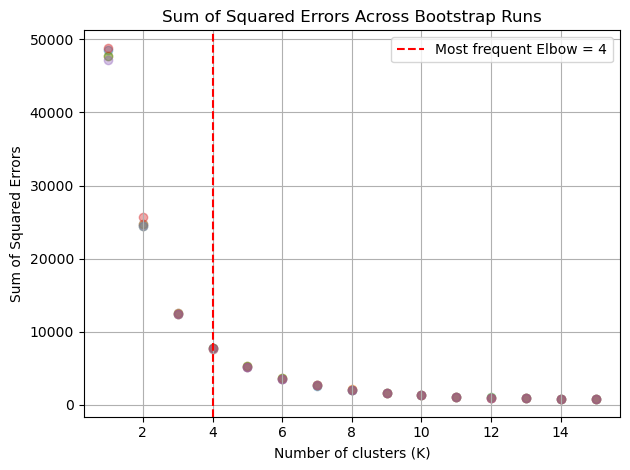

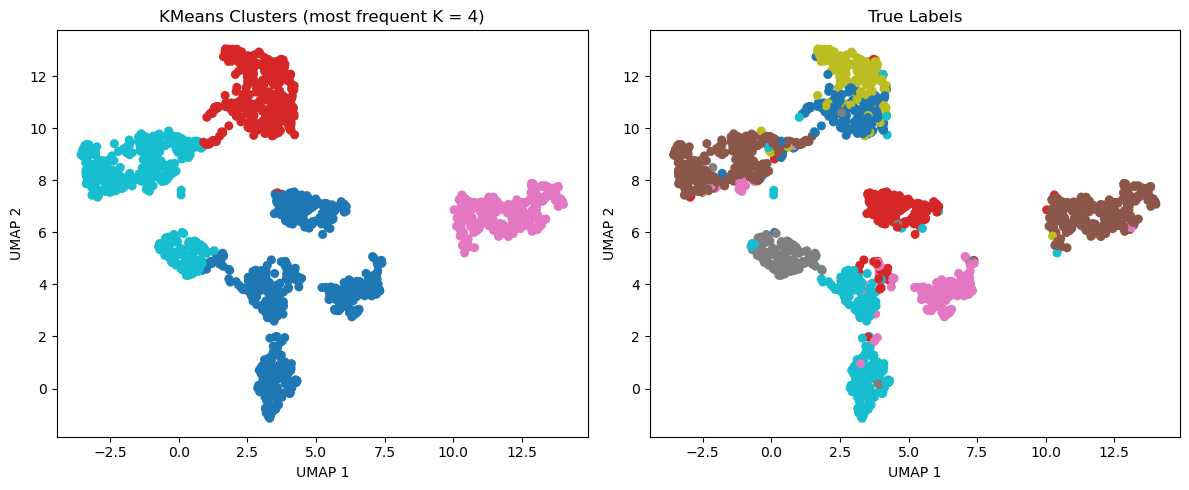

ARI (vs true labels): 0.452
NMI (vs true labels): 0.643
ARI: 1.0
NMI: 1.0


In [19]:
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)

num_runs = 5
cluster_size = np.arange(1,16)
results = kmeans_outerloop(num_runs,cluster_size, X_umap, y, mode ='elbow')

# Extract the ARI and NMI matrices
ari_matrix = results['ari_matrix']
nmi_matrix = results['nmi_matrix']
# Print the ARI and NMI scores
ari_matrix_no_diag = ari_matrix[~np.eye(ari_matrix.shape[0], dtype=bool)].reshape(ari_matrix.shape[0], -1)
nmi_matrix_no_diag = nmi_matrix[~np.eye(nmi_matrix.shape[0], dtype=bool)].reshape(nmi_matrix.shape[0], -1)
print("ARI:" , ari_matrix_no_diag.mean())
print("NMI:" , nmi_matrix_no_diag.mean())

## Silhouette 

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


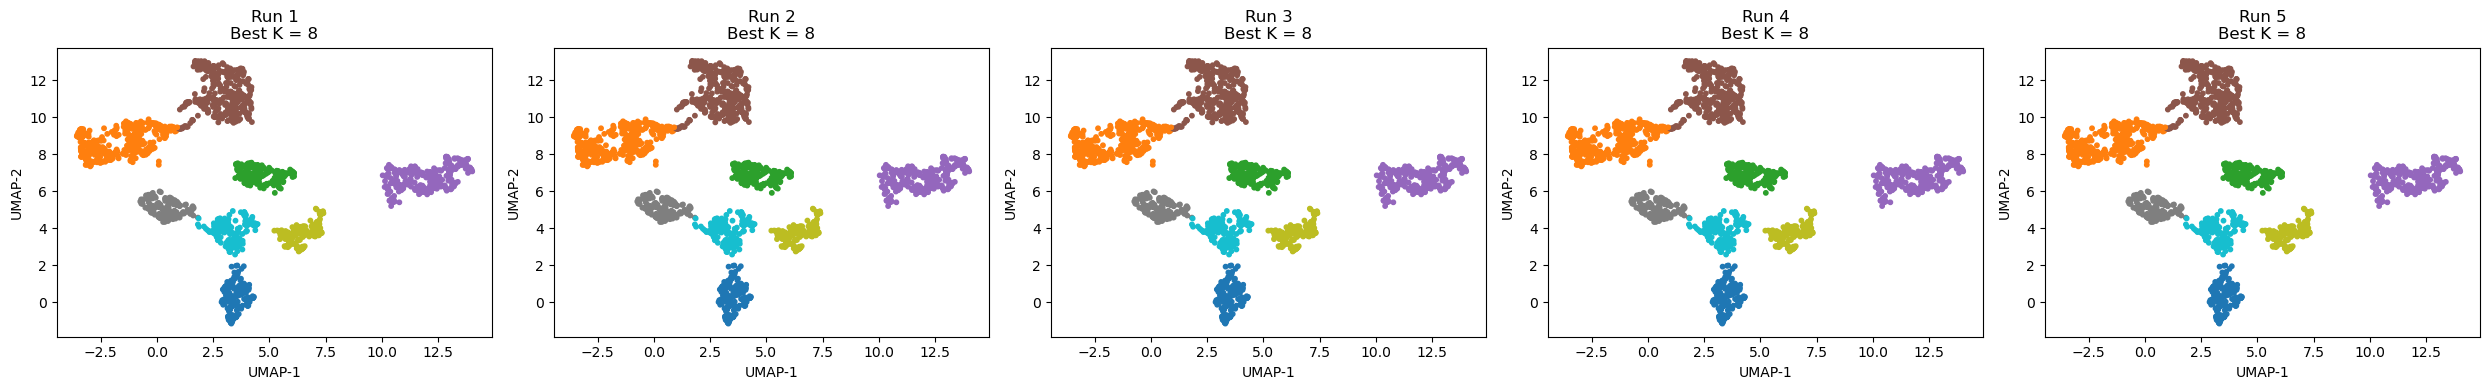

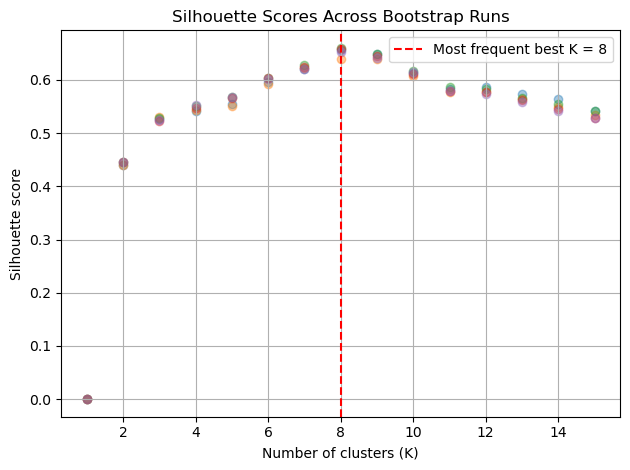

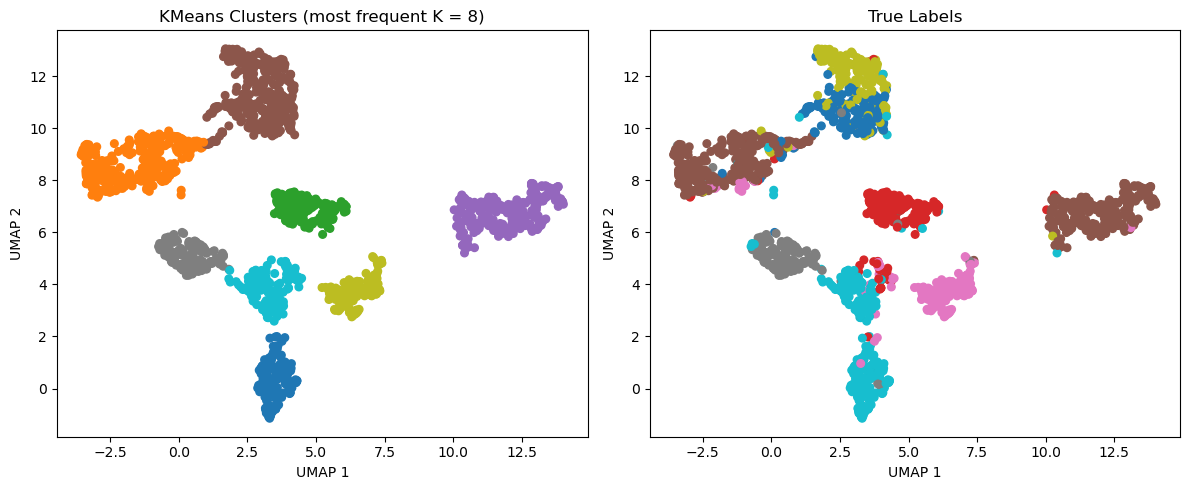

ARI (vs true labels): 0.774
NMI (vs true labels): 0.815
ARI: 1.0
NMI: 1.0


In [20]:
X = df_mnist.iloc[:, :-1].values
y = df_mnist.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)

num_runs = 5
cluster_size = np.arange(1,16)
results = kmeans_outerloop(num_runs,cluster_size, X_umap, y, mode ='silhouette')

# Extract the ARI and NMI matrices
ari_matrix = results['ari_matrix']
nmi_matrix = results['nmi_matrix']
# Print the ARI and NMI scores
ari_matrix_no_diag = ari_matrix[~np.eye(ari_matrix.shape[0], dtype=bool)].reshape(ari_matrix.shape[0], -1)
nmi_matrix_no_diag = nmi_matrix[~np.eye(nmi_matrix.shape[0], dtype=bool)].reshape(nmi_matrix.shape[0], -1)
print("ARI:" , ari_matrix_no_diag.mean())
print("NMI:" , nmi_matrix_no_diag.mean())

# Cats and Dogs Dataset

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


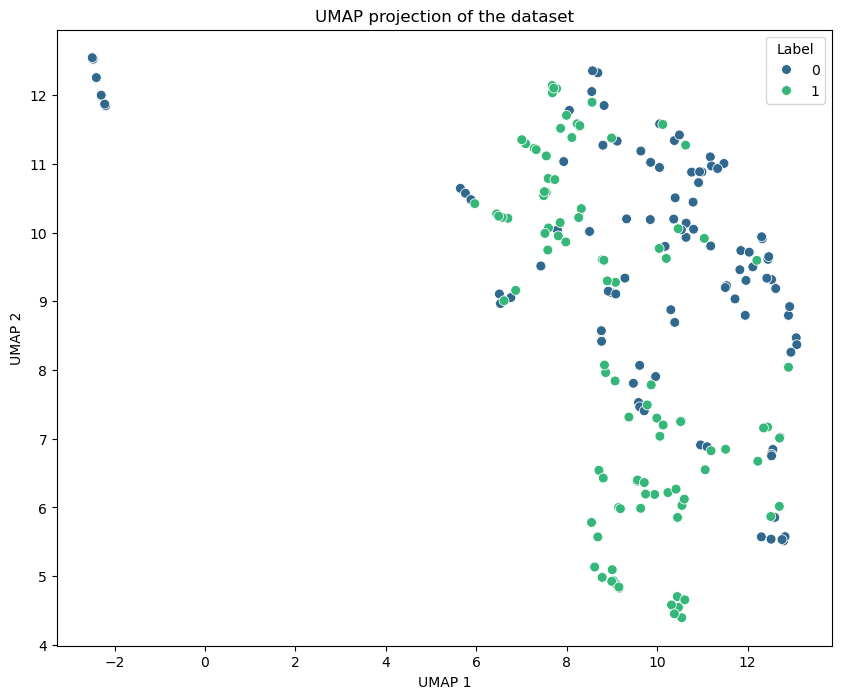

In [21]:
# Now for the cat-dog dataset
# Use UMAP to create a low-dimensional representation of the data

df = pd.read_csv('../project_2/catdogdata.txt', delimiter = ' ')
df['label'] = 0 # cats are the first 99 entries
df.loc[99:198, 'label'] = 1 # dogs are the next 99 entries

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data
X_umap = umap_model.fit_transform(X)
# Plot the UMAP representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', s=50)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Label')
plt.show()

## Elbow

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


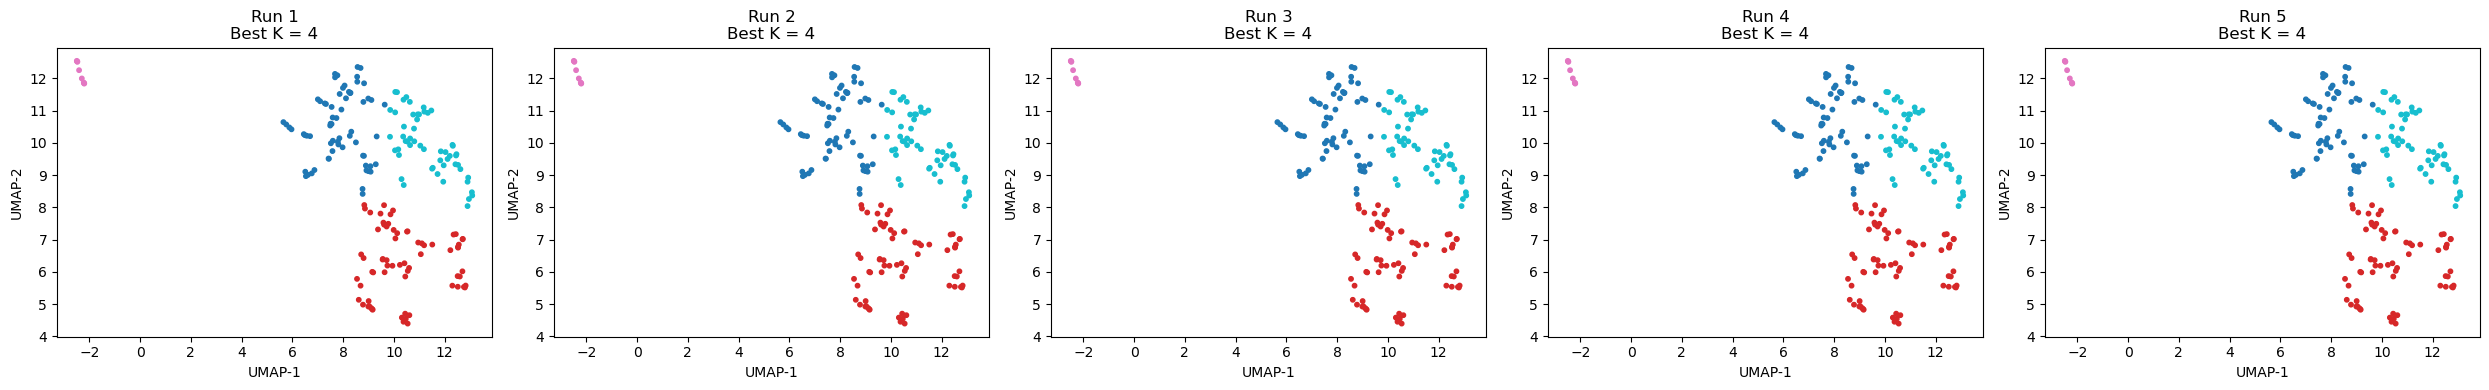

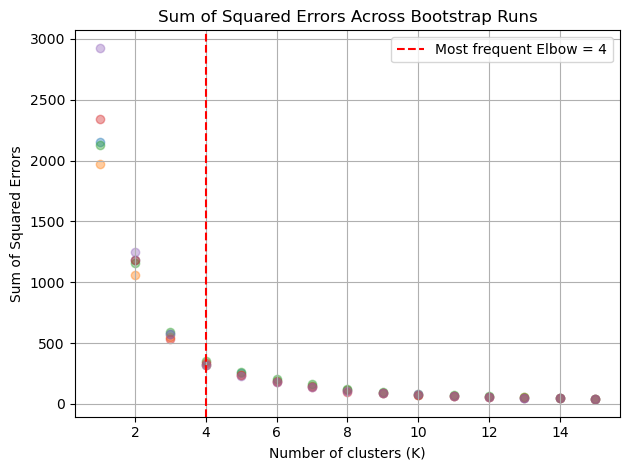

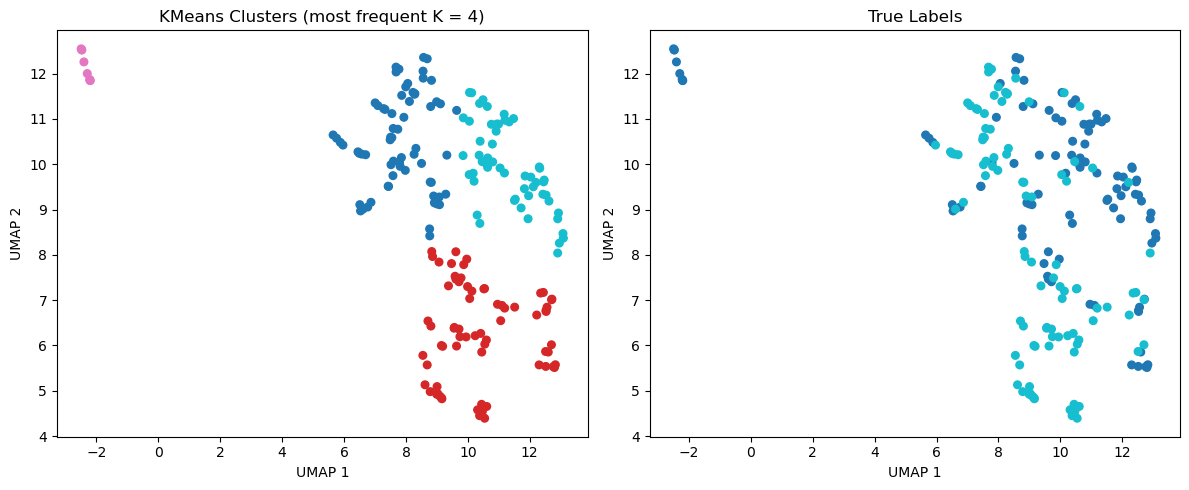

ARI (vs true labels): 0.138
NMI (vs true labels): 0.160
ARI: 1.0
NMI: 1.0


In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=3, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)

num_runs = 5
cluster_size = np.arange(1,16)
results = kmeans_outerloop(num_runs,cluster_size, X_umap, y, mode ='elbow')

# Extract the ARI and NMI matrices
ari_matrix = results['ari_matrix']
nmi_matrix = results['nmi_matrix']
# Print the ARI and NMI scores
ari_matrix_no_diag = ari_matrix[~np.eye(ari_matrix.shape[0], dtype=bool)].reshape(ari_matrix.shape[0], -1)
nmi_matrix_no_diag = nmi_matrix[~np.eye(nmi_matrix.shape[0], dtype=bool)].reshape(nmi_matrix.shape[0], -1)
print("ARI:" , ari_matrix_no_diag.mean())
print("NMI:" , nmi_matrix_no_diag.mean())

## Silhouette

c:\Users\hampu\anaconda3\envs\umap-env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


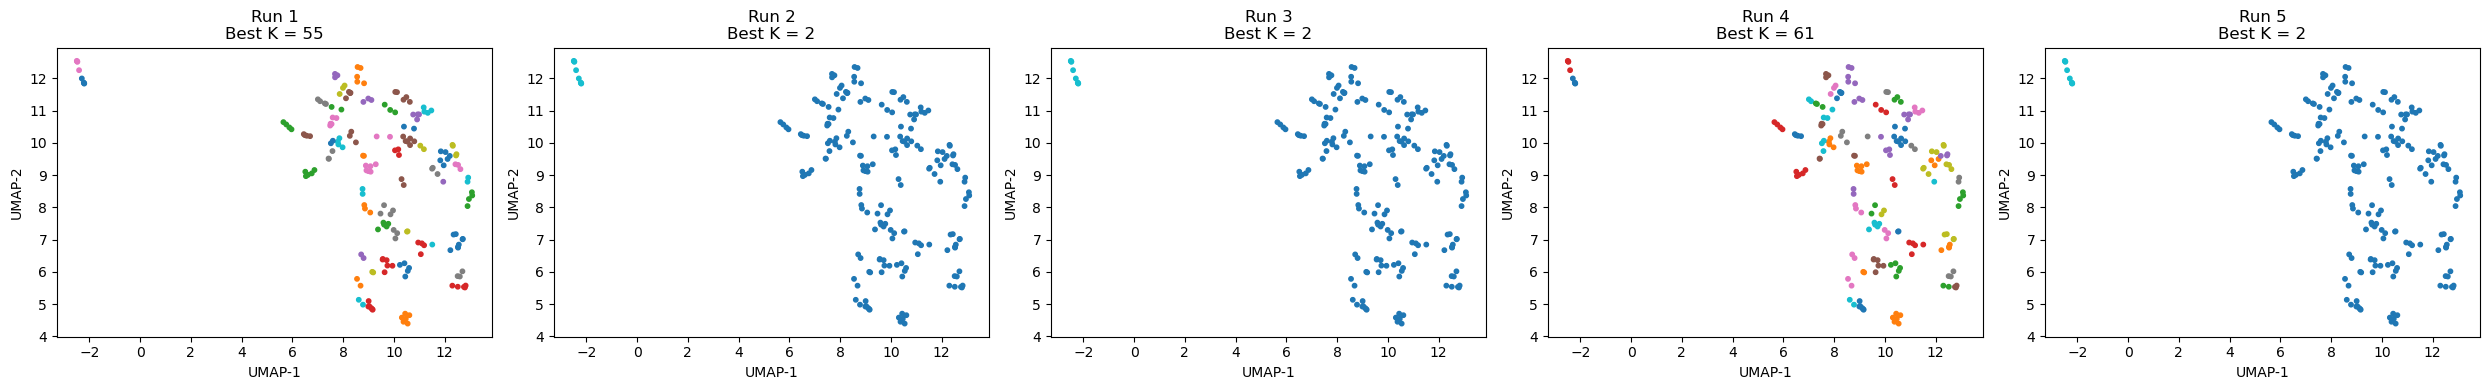

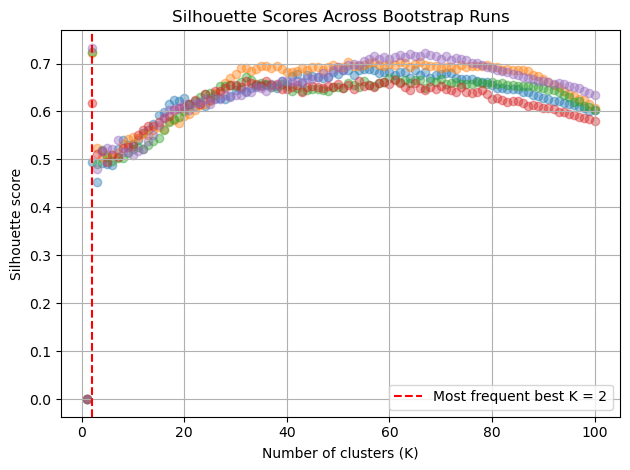

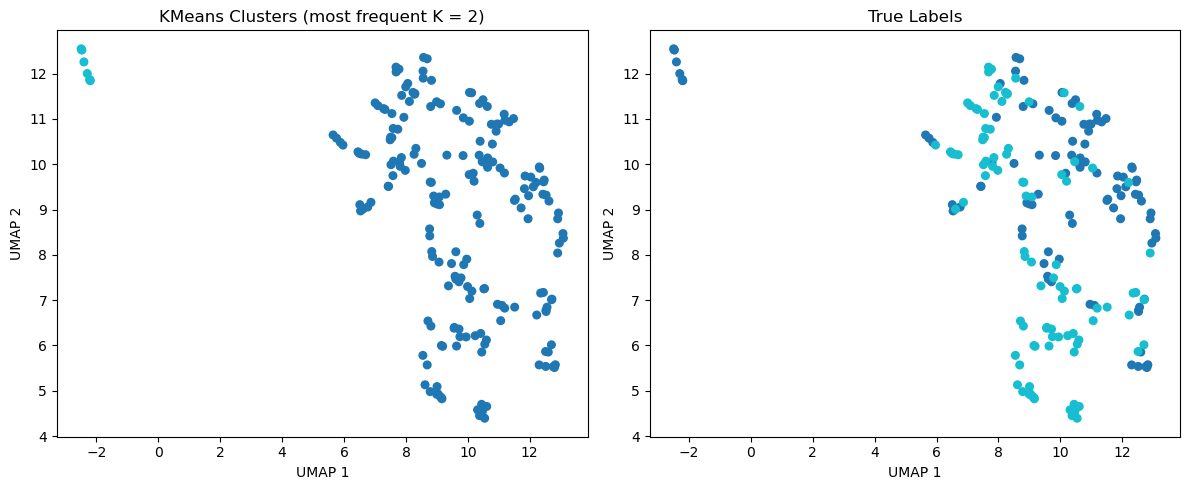

ARI (vs true labels): 0.007
NMI (vs true labels): 0.068
ARI: 0.38601068138337424
NMI: 0.4456036361993063


In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_umap = umap.UMAP(n_neighbors=3, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)

num_runs = 5
cluster_size = np.arange(1,101)
results = kmeans_outerloop(num_runs,cluster_size, X_umap, y, mode ='silhouette')

# Extract the ARI and NMI matrices
ari_matrix = results['ari_matrix']
nmi_matrix = results['nmi_matrix']
# Print the ARI and NMI scores
ari_matrix_no_diag = ari_matrix[~np.eye(ari_matrix.shape[0], dtype=bool)].reshape(ari_matrix.shape[0], -1)
nmi_matrix_no_diag = nmi_matrix[~np.eye(nmi_matrix.shape[0], dtype=bool)].reshape(nmi_matrix.shape[0], -1)
print("ARI:" , ari_matrix_no_diag.mean())
print("NMI:" , nmi_matrix_no_diag.mean())

# Part 2